# Analysis of track-cluster matched files, when cluster energy is summed for individual calorimenters

last update Oct-7, 2021 (EOC)



## definitions

In [3]:
from IPython.display import display
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
from my_tools               import *; 
from plot_tools             import *;
from my_data_analysis_tools import *;
%config InlineBackend.figure_format = 'retina'
main_data_path = '/Users/erezcohen/Desktop/data/BAND/AnalysisCSVfiles/'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
import ROOT

Welcome to JupyROOT 6.24/04


In [53]:
calorimeter_names=["FHCAL", "FEMC", "DRCALO", "EEMC", "CEMC", "EHCAL", "HCALIN", "HCALOUT", "LFHCAL", "EEMCG", "BECAL"]
Ncalorimeters = len(calorimeter_names)

In [220]:
color = plt.get_cmap('viridis')(np.linspace(0, 1, 4)[1:3])
params_IEEEtran = {'legend.fontsize': 10,
                   'axes.labelsize': 10,
                   'axes.titlesize': 10,
                   'xtick.labelsize': 9,
                   'ytick.labelsize': 9,
                   'mathtext.fontset': 'stix',
                   'font.family': 'Times New Roman',
                   'mathtext.rm': 'serif',
                   'mathtext.bf': 'serif:bold',
                   'mathtext.it': 'serif:italic',
                   'mathtext.sf': 'sans\\-serif',
                   'grid.color': 'k',
                   'grid.linestyle': ':',
                   'grid.linewidth': 0.5,
                   'axes.xmargin': 0,
                   'axes.axisbelow': False,
                   'lines.linewidth': 1.0,
                   'legend.frameon': False,
                   'axes.prop_cycle': cycler('color', plt.get_cmap('viridis')(np.linspace(0, 1, 4))),
                   'figure.figsize': [3, 2.4],
                   }

## load data

In [20]:
e_rootfile  = ROOT.TFile("/Users/erezcohen/Desktop/data/EIC/ECCE/ElectronPionPID/electron_track_cluster_individualcalo.root")
e_ttree     = e_rootfile.Get("T")
e_entries   = e_ttree.GetEntriesFast()
print(e_entries,'electron events')

pi_rootfile = ROOT.TFile("/Users/erezcohen/Desktop/data/EIC/ECCE/ElectronPionPID/pion_track_cluster_individualcalo.root")
pi_ttree    = pi_rootfile.Get("T")
pi_entries  = pi_ttree.GetEntriesFast()
print(pi_entries,'pion events')

4581566 electron events
4640815 pion events


In [32]:
Pe  = np.array(e_ttree.AsMatrix(columns=["p_track"]))
Ppi = np.array(pi_ttree.AsMatrix(columns=["p_track"]))

/usr/local/Cellar/root/6.24.04/lib/root/ROOT/pythonization/_ttree.py:191: FutureWarning: TTree.AsMatrix is deprecated since v6.24 and will be removed in v6.26. Please use instead RDataFrame.AsNumpy.
  warnings.warn("TTree.AsMatrix is deprecated since v6.24 and will be removed in v6.26. Please use instead RDataFrame.AsNumpy.", FutureWarning)


In [225]:
eta_e  = np.array(e_ttree.AsMatrix(columns=["eta_track"]))
eta_pi = np.array(pi_ttree.AsMatrix(columns=["eta_track"]))

/usr/local/Cellar/root/6.24.04/lib/root/ROOT/pythonization/_ttree.py:191: FutureWarning: TTree.AsMatrix is deprecated since v6.24 and will be removed in v6.26. Please use instead RDataFrame.AsNumpy.
  warnings.warn("TTree.AsMatrix is deprecated since v6.24 and will be removed in v6.26. Please use instead RDataFrame.AsNumpy.", FutureWarning)


In [57]:
EClusterTot_e = dict()
for calorimeter_name in calorimeter_names:
    EClusterTot_e[calorimeter_name] = []

for i in range(e_entries): 
    e_ttree.GetEntry(i)
    for calorimeter_name,calorimeter_idx in zip(calorimeter_names,range(Ncalorimeters)):
        EClusterTot_e[calorimeter_name].append(e_ttree.E_clusters[calorimeter_idx])    

AttributeError: module 'numpy' has no attribute 'arrray'

In [58]:
for calorimeter_name in calorimeter_names:
    EClusterTot_e[calorimeter_name] = np.array(EClusterTot_e[calorimeter_name])
print(EClusterTot_e)

{'FHCAL': array([0., 0., 0., ..., 0., 0., 0.]), 'FEMC': array([ 8.2083931 ,  0.        ,  0.        , ...,  0.        ,
        6.16495037, 20.33476257]), 'DRCALO': array([0., 0., 0., ..., 0., 0., 0.]), 'EEMC': array([0.        , 0.        , 0.        , ..., 1.04146659, 0.        ,
       0.        ]), 'CEMC': array([0., 0., 0., ..., 0., 0., 0.]), 'EHCAL': array([0.        , 0.        , 1.53710246, ..., 0.        , 0.        ,
       0.        ]), 'HCALIN': array([0., 0., 0., ..., 0., 0., 0.]), 'HCALOUT': array([0., 0., 0., ..., 0., 0., 0.]), 'LFHCAL': array([0.       , 0.       , 0.       , ..., 0.       , 0.       ,
       0.2685006]), 'EEMCG': array([0., 0., 0., ..., 0., 0., 0.]), 'BECAL': array([ 0.        , 13.16500092,  0.        , ...,  0.        ,
        0.        ,  0.        ])}


In [59]:
EClusterTot_pi = dict()
for calorimeter_name in calorimeter_names:
    EClusterTot_pi[calorimeter_name] = []

for i in range(pi_entries): 
    pi_ttree.GetEntry(i)
    for calorimeter_name,calorimeter_idx in zip(calorimeter_names,range(Ncalorimeters)):
        EClusterTot_pi[calorimeter_name].append(pi_ttree.E_clusters[calorimeter_idx])
    

In [60]:
for calorimeter_name in calorimeter_names:
    EClusterTot_pi[calorimeter_name] = np.array(EClusterTot_pi[calorimeter_name])

print(EClusterTot_pi)

{'FHCAL': array([0., 0., 0., ..., 0., 0., 0.]), 'FEMC': array([0.        , 0.        , 0.        , ..., 0.        , 0.36385536,
       4.82259655]), 'DRCALO': array([0., 0., 0., ..., 0., 0., 0.]), 'EEMC': array([0.        , 0.        , 0.        , ..., 0.10893334, 0.        ,
       0.        ]), 'CEMC': array([0., 0., 0., ..., 0., 0., 0.]), 'EHCAL': array([0.        , 0.        , 0.59420925, ..., 0.19856587, 0.        ,
       0.        ]), 'HCALIN': array([0., 0., 0., ..., 0., 0., 0.]), 'HCALOUT': array([0.        , 1.46144772, 0.        , ..., 0.        , 0.        ,
       0.        ]), 'LFHCAL': array([6.79489759, 0.        , 0.        , ..., 0.        , 3.37900519,
       9.12207794]), 'EEMCG': array([0., 0., 0., ..., 0., 0., 0.]), 'BECAL': array([0.        , 9.31220391, 0.        , ..., 0.        , 0.        ,
       0.        ])}


## auxiliary functions

In [35]:
e_color = 'k';
pi_color='royalblue';

In [283]:
def plot_step_hist( x_arr, bins=np.linspace(0,1,10), label="", color='k', density=False):
    h,edges = np.histogram( x_arr, bins=bins )
    h_err = np.sqrt(h)

    if density==True:
        h_err = h_err/np.sum(h)
        h     = h / np.sum(h)

    x     = (edges[1:] + edges[:-1])/2
    x_err = (edges[1:] - edges[:-1])/2
    plt.step ( x, h, color=color, where='mid', label=None ) 
    plt.errorbar ( x=x, xerr=x_err, y=h, yerr=h_err, color=color, marker='o', linestyle='None',label=label, capsize=2, capthick=2 )
    return x,h,x_err,h_err

In [210]:
def compute_survival_rate( x_e, x_pi, x_cut, filter_direction='above'):
    # f_e_in_cut, f_pi_in_cut, f_e_in_cut_err, f_pi_in_cut_err = 
    # compute_survival_rate( x_e, x_p, x_cut, filter_direction='above')
    if filter_direction=='above':        
        x_e_in_cut  = x_e [x_e > x_cut]
        x_pi_in_cut = x_pi[x_pi > x_cut]

    elif filter_direction=='below':        
        x_e_in_cut  = x_e [x_cut > x_e]
        x_pi_in_cut = x_pi[x_cut > x_pi]
        
    N_e        = float(len(x_e))
    N_e_in_cut = float(len(x_e_in_cut))
    f_e_in_cut = N_e_in_cut / N_e
    f_e_in_cut_err = f_e_in_cut*sqrt(1./N_e_in_cut +1./N_e)

    N_pi        = float(len(x_pi))
    N_pi_in_cut = float(len(x_pi_in_cut))
    f_pi_in_cut = N_pi_in_cut / N_pi
    f_pi_in_cut_err = f_pi_in_cut*sqrt(1./N_pi_in_cut +1./N_pi)

    return f_e_in_cut, f_pi_in_cut, f_e_in_cut_err, f_pi_in_cut_err

In [240]:
def print_number_of_events(df_e,df_pi, Ne_0, Npi_0,label=''):
    # Ne,Npi,fe,fe_err,fpi,fpi_err = print_number_of_events(df_e,df_pi, Ne_0, Npi_0,label='')
    Ne  = float(len(df_e))
    Npi = float(len(df_pi))
    Ne_0, Npi_0 = float(Ne_0), float(Npi_0)
    fe      = Ne/Ne_0
    fe_err  = fe*np.sqrt(1./np.max([1,Ne]) + 1./Ne_0)
    fpi     = Npi/Npi_0
    fpi_err = fpi*np.sqrt(1./np.max([1,Npi]) + 1./Npi_0)
    
    print(label + ' electrons survival: %.2f +/- %.2f, pions survival: %.2f+/-%.2f'
          %( 100.*fe, 100.*fe_err,100.*fpi,100.*fpi_err), '%')
    return Ne,Npi

In [284]:
def plot_calorimetry_response(df_e  = e_center,
                              df_pi = pi_center,
                              caloname = 'BECAL',
                              P_bins = np.linspace(0,25,100),                             
                              ECALtot_bins = np.linspace(0.5,15,100),
                              EoverP_bins = np.linspace(0.1,1.2,100),
                              EoverP_cut=1,
                              fdebug=0):
    
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(2,2,1)
    plot_step_hist( df_e['p'],  bins=P_bins, label="$e$", color=e_color)
    plot_step_hist( df_pi['p'], bins=P_bins, label="$\pi$", color=pi_color)
    set_axes(ax,'$p$ [GeV/c]','counts',title='Reconstructed momentum',do_add_grid=True,do_add_legend=True)
    ax.set_yscale('log')


    ax = fig.add_subplot(2,2,2)
    plot_step_hist( df_e[ caloname+' E'], bins=ECALtot_bins, label="$e$", color=e_color)
    plot_step_hist( df_pi[caloname+' E'], bins=ECALtot_bins, label="$\pi$", color=pi_color)
    set_axes(ax,'$\sum E_{cluster}$ [GeV]','',title='Sum over cluster energy in '+caloname,do_add_grid=True,do_add_legend=True)
    ax.set_yscale('log')


    ax = fig.add_subplot(2,2,(3,4))
    x,h_e,x_err,h_err_e   = plot_step_hist( df_e [caloname+' E/p'] , bins=EoverP_bins, label="$e$", color=e_color  , density=True)
    x,h_pi,x_err,h_err_pi = plot_step_hist( df_pi[caloname+' E/p'], bins=EoverP_bins, label="$\pi$", color=pi_color, density=True)
    ax.plot( [EoverP_cut,EoverP_cut],ax.get_ylim(),'-r' )
    set_axes(ax,'$\sum E_{cluster}/p$','',title=caloname+' calorimetry response',do_add_grid=True,
             do_add_legend=False)

    plt.tight_layout()
    
    if fdebug:
        print('h_e[0:10]:',h_e[0:10])
        print('herr_e[0:10]:',h_err_e[0:10])

## compute $E/p$ and define dataframes

In [185]:
for calorimeter_name in calorimeter_names:
    print(calorimeter_name)
    EClusterTot_pi[calorimeter_name + ' E/p'] = EClusterTot_pi[calorimeter_name]/np.squeeze(Ppi)
    EClusterTot_e[calorimeter_name + ' E/p']  = EClusterTot_e[calorimeter_name] /np.squeeze(Pe)

FHCAL
FEMC
DRCALO
EEMC
CEMC
EHCAL
HCALIN
HCALOUT
LFHCAL
EEMCG
BECAL


In [316]:
pions = pd.DataFrame({'p':np.squeeze(Ppi),
                      'eta':np.squeeze(eta_pi),
                      'BECAL E':EClusterTot_pi['BECAL']    ,'BECAL E/p':EClusterTot_pi['BECAL E/p'],
                      'EEMC E':EClusterTot_pi['EEMC']      ,'EEMC E/p':EClusterTot_pi['EEMC E/p'],
                      'FEMC E':EClusterTot_pi['FEMC']      ,'FEMC E/p':EClusterTot_pi['FEMC E/p'],
                      'HCALIN E':EClusterTot_pi['HCALIN']  ,'HCALIN E/p':EClusterTot_pi['HCALIN E/p'],
                      'HCALOUT E':EClusterTot_pi['HCALOUT'],'HCALOUT E/p':EClusterTot_pi['HCALOUT E/p'],
                     })

electrons = pd.DataFrame({'p':np.squeeze(Pe),
                          'eta':np.squeeze(eta_e),
                          'BECAL E':EClusterTot_e['BECAL']    ,'BECAL E/p':EClusterTot_e['BECAL E/p'],
                          'EEMC E':EClusterTot_e['EEMC']    ,'EEMC E/p':EClusterTot_e['EEMC E/p'],
                          'FEMC E':EClusterTot_e['FEMC']    ,'FEMC E/p':EClusterTot_e['FEMC E/p'],
                          'HCALIN E':EClusterTot_e['HCALIN']  ,'HCALIN E/p':EClusterTot_e['HCALIN E/p'],
                          'HCALOUT E':EClusterTot_e['HCALOUT'],'HCALOUT E/p':EClusterTot_e['HCALOUT E/p'],                         
                     })

In [334]:
pions['HCAL IN+OUT E/p'] = pions['HCALIN E/p'] + pions['HCALOUT E/p']
electrons['HCAL IN+OUT E/p'] = electrons['HCALIN E/p'] + electrons['HCALOUT E/p']

## Event selection cuts

#### centeral region $ -0.88 < \eta < 0.88$

In [294]:
Ne_0,Npi_0 = print_number_of_events( electrons,pions, len(electrons), len(pions),label='before cuts')
print(Ne_0,Npi_0)

before cuts electrons survival: 100.00 +/- 0.07, pions survival: 100.00+/-0.07 %
4581566.0 4640815.0


In [296]:
e_center = electrons[np.abs(electrons['eta'])<0.88]
pi_center= pions[np.abs(pions['eta'])<0.88]
Ne_center,Npi_center = print_number_of_events( e_center,pi_center, Ne_0, Npi_0,label='In centeral region');

In centeral region electrons survival: 27.00 +/- 0.03, pions survival: 26.85+/-0.03 %


#### $E/p$ cut in the centeral barrel EM calorimeter

In [297]:
BECAL_EoverP_min   = 0.7
e_center_BECAL  = e_center[e_center['BECAL E/p']>BECAL_EoverP_min]
pi_center_BECAL = pi_center[pi_center['BECAL E/p']>BECAL_EoverP_min]
print_number_of_events( e_center_BECAL,pi_center_BECAL, Ne_0,Npi_0,label='Requiring E/p in BECAL>%.1f'%BHCAL_EoverP_min);
print_number_of_events( e_center_BECAL,pi_center_BECAL, Ne_center,Npi_center ,label='In the centeral region E/p in BECAL>%.1f'%BHCAL_EoverP_min);

Requiring E/p in BECAL>0.7 electrons survival: 25.75 +/- 0.03, pions survival: 1.17+/-0.01 %
In the centeral region E/p in BECAL>0.7 electrons survival: 95.39 +/- 0.12, pions survival: 4.36+/-0.02 %


#### $E/p$ cut in the centeral inner hadronic calorimeter

In [298]:
HCALIN_EoverP_max   = 0.08
e_center_HCALIN  = e_center_BECAL[HCALIN_EoverP_max > e_center_BECAL['HCALIN E/p']]
pi_center_HCALIN = pi_center_BECAL[HCALIN_EoverP_max > pi_center_BECAL['HCALIN E/p']]
print_number_of_events( e_center_HCALIN, pi_center_HCALIN, Ne_0,Npi_0,label='Requiring E/p in HCALIN<%.2f'%HCALIN_EoverP_max);
print_number_of_events( e_center_HCALIN, pi_center_HCALIN, Ne_center,Npi_center ,label='In the centeral region E/p in HCALIN<%.2f'%HCALIN_EoverP_max);

Requiring E/p in HCALIN<0.08 electrons survival: 25.72 +/- 0.03, pions survival: 1.17+/-0.01 %
In the centeral region E/p in HCALIN<0.08 electrons survival: 95.26 +/- 0.12, pions survival: 4.35+/-0.02 %


####  $E/p$ cut in the centeral outer hadronic calorimeter

In [299]:
HCALOUT_EoverP_max   = 0.15
e_center_HCALOUT  = e_center_HCALIN[HCALOUT_EoverP_max > e_center_HCALIN['HCALOUT E/p']]
pi_center_HCALOUT = pi_center_HCALIN[HCALOUT_EoverP_max > pi_center_HCALIN['HCALOUT E/p']]
print_number_of_events( e_center_HCALOUT, pi_center_HCALOUT, Ne_0,Npi_0,label='Requiring E/p in HCALOUT<%.2f'%HCALOUT_EoverP_max);
print_number_of_events( e_center_HCALOUT, pi_center_HCALOUT, Ne_center,Npi_center,label='In the centeral region E/p in HCALOUT<%.2f'%HCALOUT_EoverP_max);

Requiring E/p in HCALOUT<0.15 electrons survival: 25.68 +/- 0.03, pions survival: 1.15+/-0.01 %
In the centeral region E/p in HCALOUT<0.15 electrons survival: 95.13 +/- 0.12, pions survival: 4.29+/-0.02 %


## Make plots

### centeral region

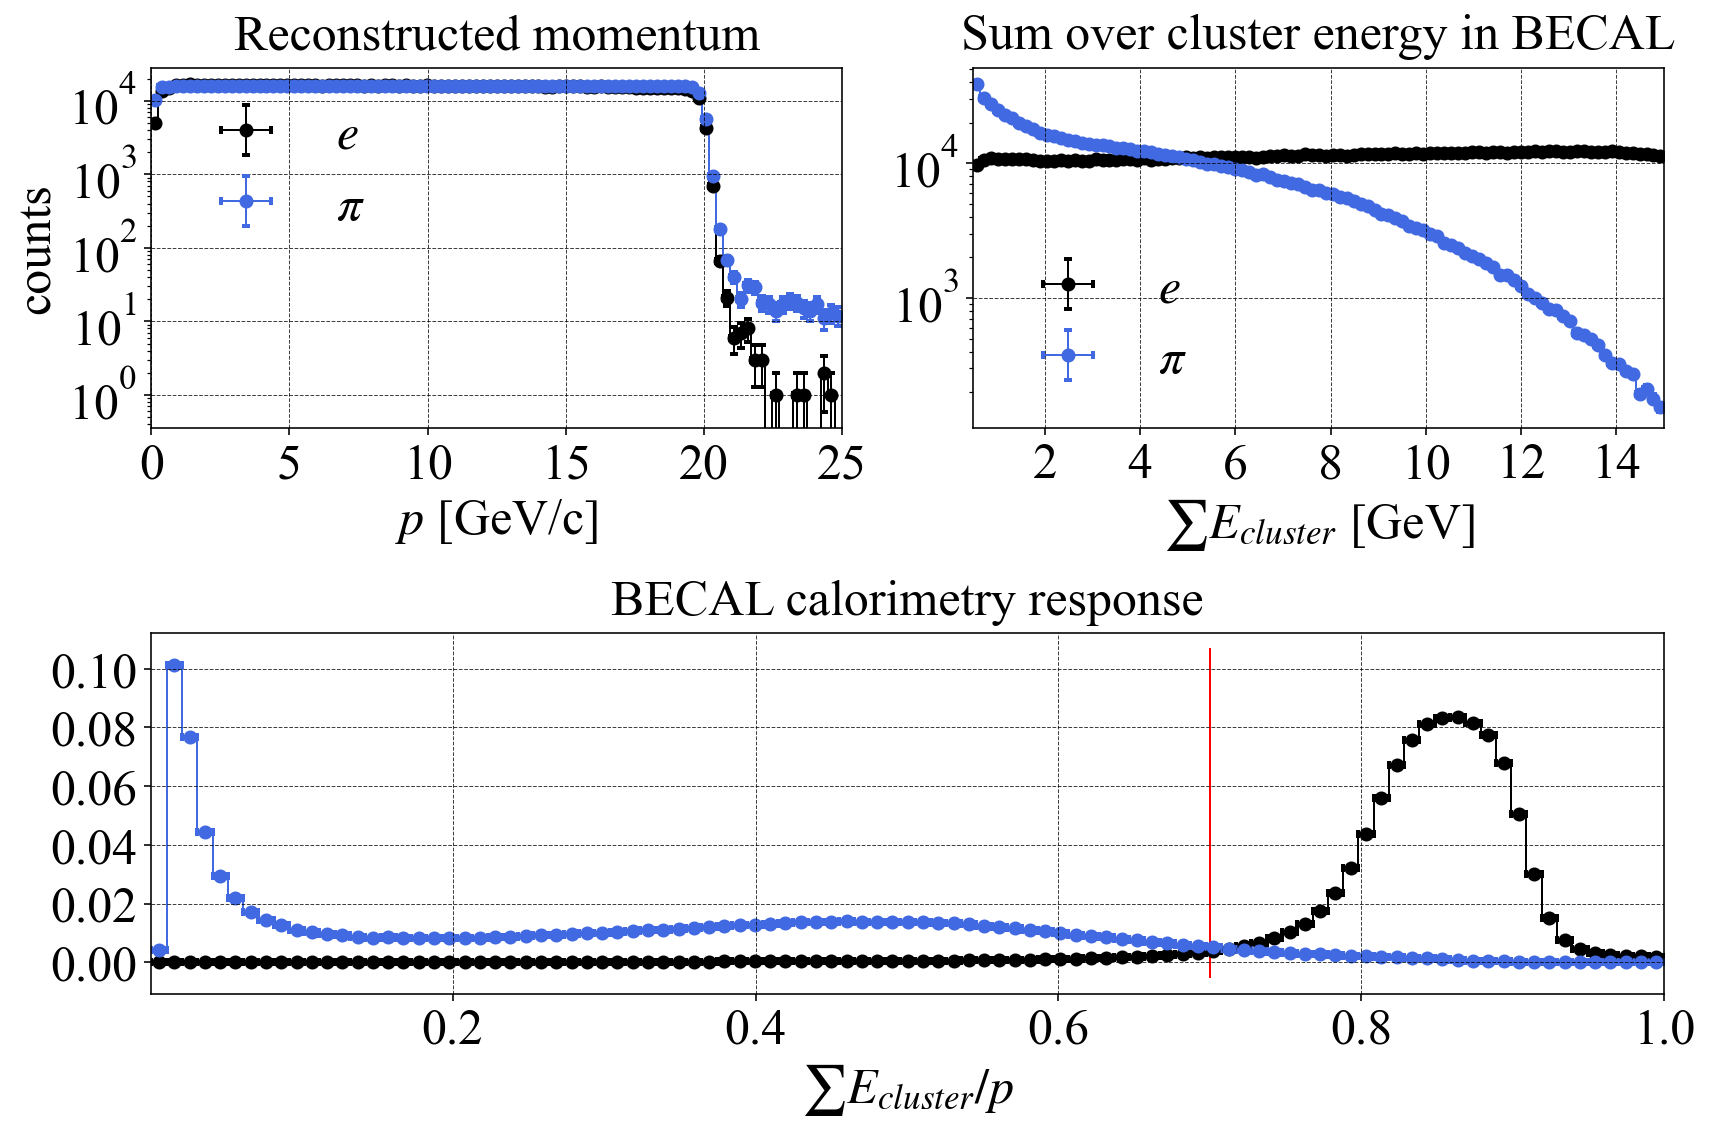

In [285]:
plot_calorimetry_response(df_e  = e_center,                          
                          df_pi = pi_center,                          
                          caloname = 'BECAL',                          
                          P_bins = np.linspace(0,25,100),                                                       
                          ECALtot_bins = np.linspace(0.5,15,100),                          
                          EoverP_bins = np.linspace(0.001,1.,100),
                          EoverP_cut=BECAL_EoverP_min)

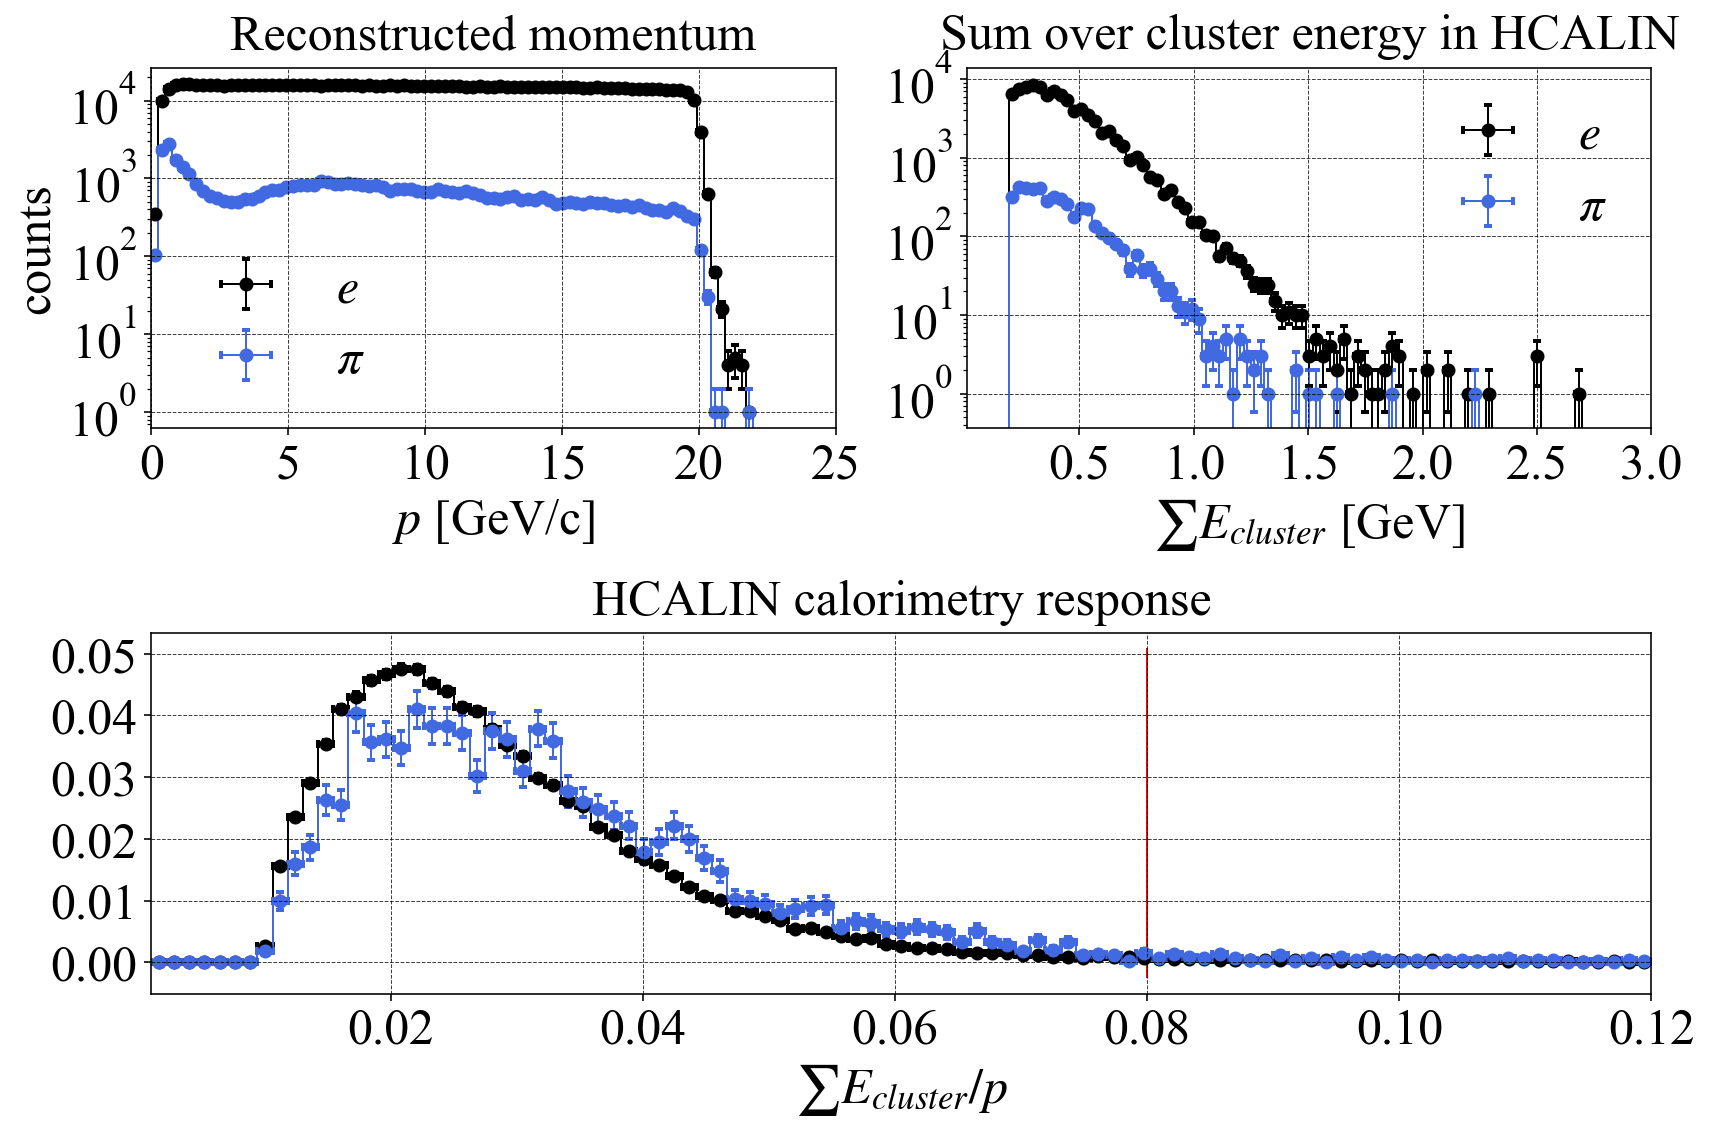

In [287]:
plot_calorimetry_response(df_e  = e_center_BECAL,                          
                          df_pi = pi_center_BECAL,                          
                          caloname = 'HCALIN',                          
                          P_bins = np.linspace(0,25,100),                                                       
                          ECALtot_bins = np.linspace(0.01,3,100),                          
                          EoverP_bins = np.linspace(0.001,0.12,100),
                          EoverP_cut=HCALIN_EoverP_max)

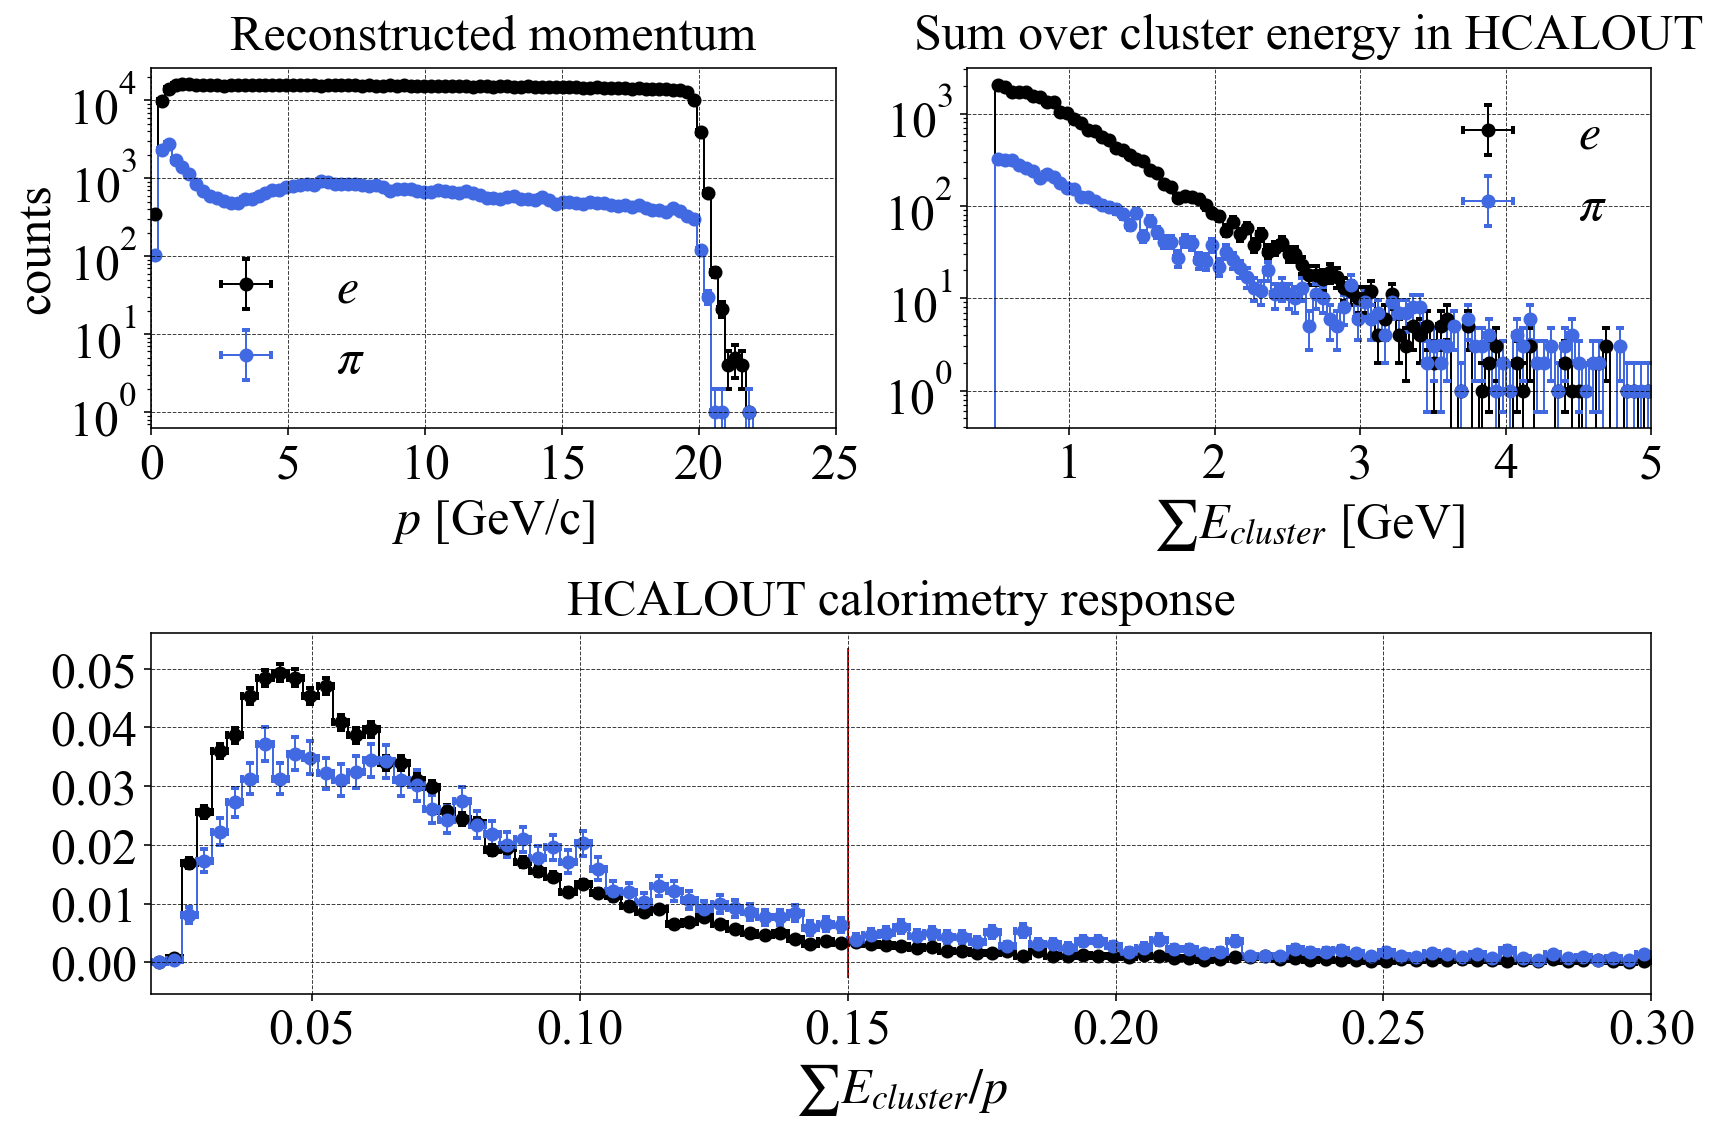

In [293]:
plot_calorimetry_response(df_e  = e_center_HCALIN,                          
                          df_pi = pi_center_HCALIN,                          
                          caloname = 'HCALOUT',                          
                          P_bins = np.linspace(0,25,100),                                                       
                          ECALtot_bins = np.linspace(0.3,5,100),                          
                          EoverP_bins = np.linspace(0.02,0.3,100),
                          EoverP_cut=HCALOUT_EoverP_max)

### Regions outside center - calorimetry vs. rapidity

In [317]:
df_e,df_pi = electrons,pions

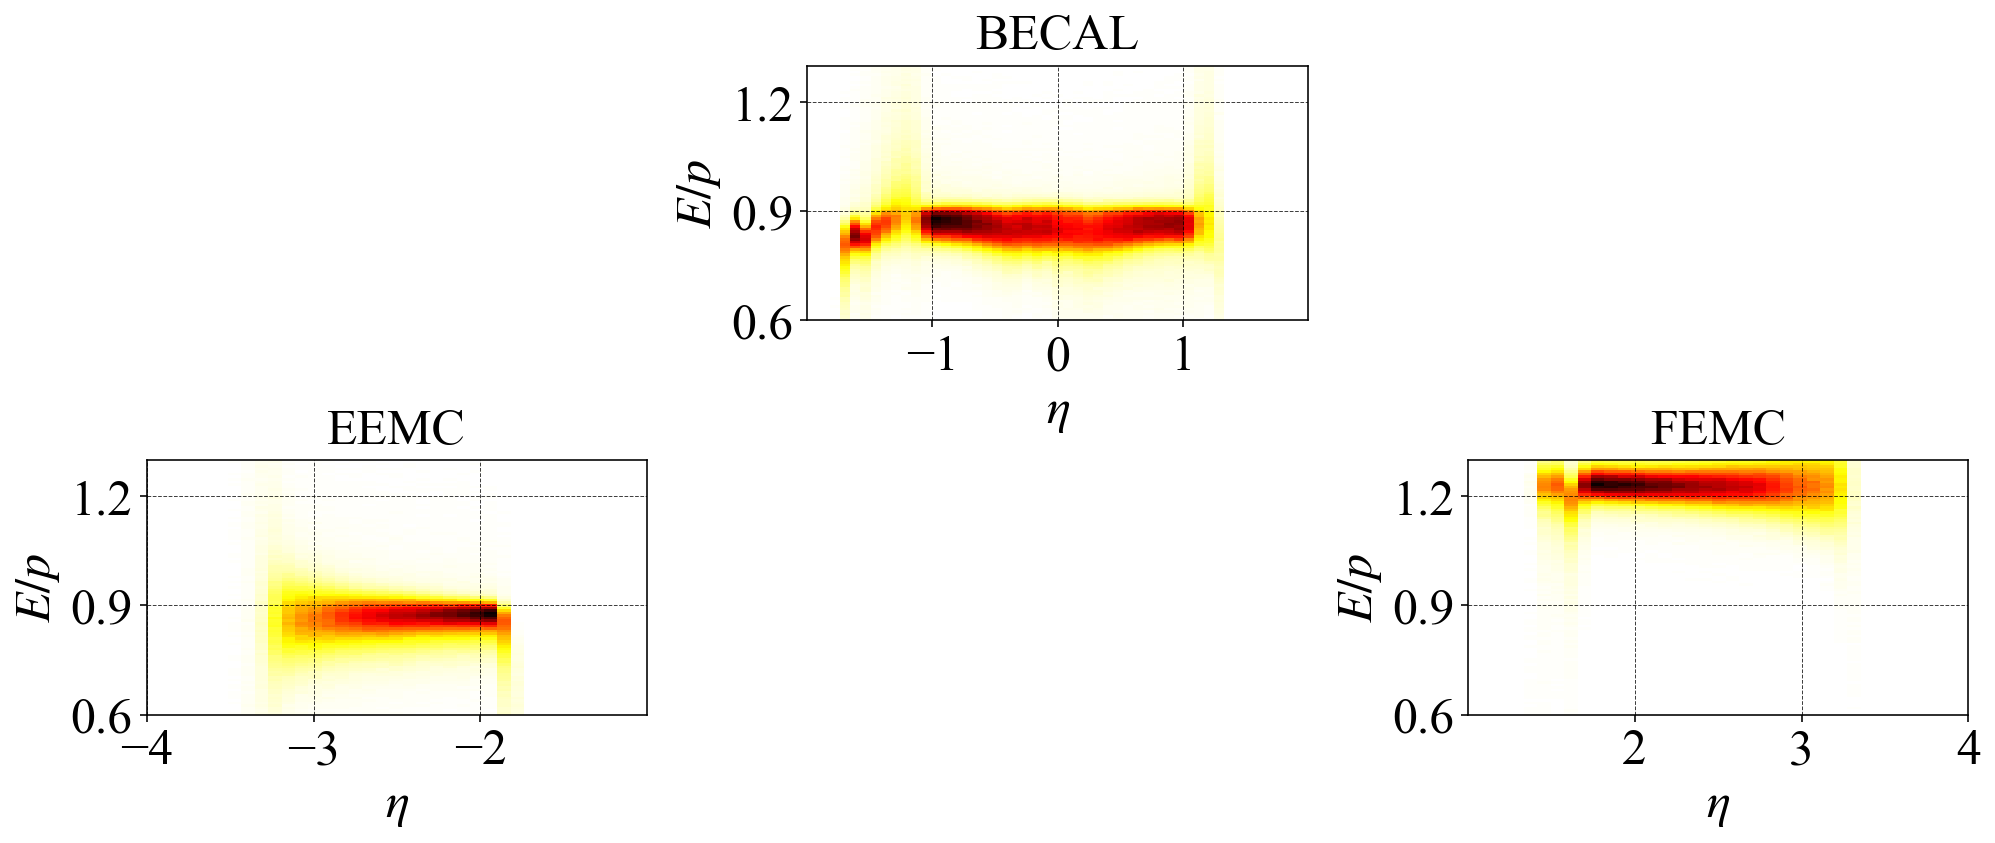

In [333]:
bins = (np.linspace(-4,4,100),np.linspace(0.6,1.3,100))
fig = plt.figure(figsize=(14,6))

for caloname,subplot_idx,xlim,xticks in zip(['EEMC','BECAL','FEMC'],
                                     [4,2,6],
                                     [(-4,-1),(-2,2),(1,4)],
                                            [(-4,-3,-2),(-1,0,1),(2,3,4)]):
    # ax.scatter(df_e['eta'],df_e[caloname+' E/p'],s=2,marker='.',label=caloname);
    ax = fig.add_subplot(2,3,subplot_idx)
    ax.hist2d(   df_e['eta'],df_e[caloname+' E/p'],bins=bins,cmap='hot_r');
    set_axes(ax,'$\eta$','$E/p$',
             title=caloname,do_add_grid=True,do_add_legend=False, 
             xticks=xticks,
             yticks=[0.6,0.9,1.2],xlim=xlim);
    
plt.tight_layout()

## examples and arxiv

In [213]:
P_bins       = np.linspace(0,25,100)
ECALtot_bins = np.linspace(0.5,15,100)
EoverP_bins  = np.linspace(0.1,1.2,100)
df_e         = e_center
df_pi        = pi_center
caloname     = 'BECAL'

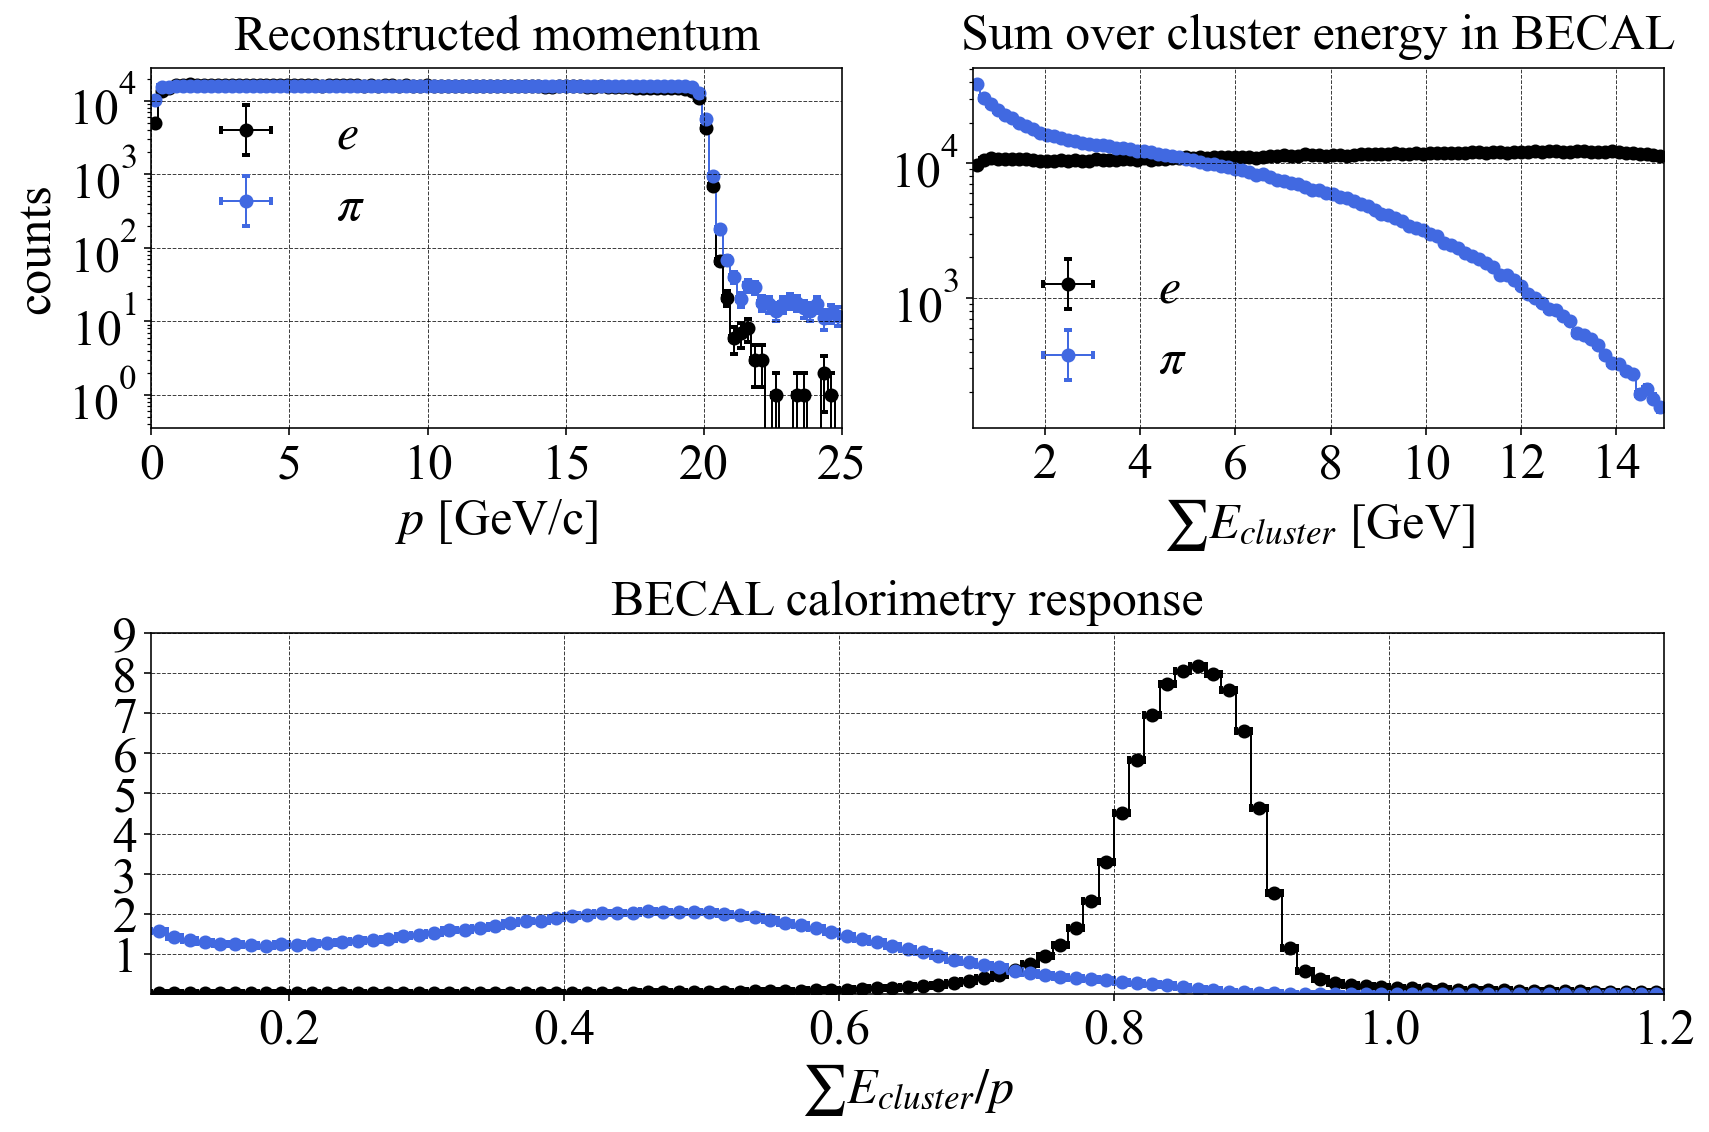

In [251]:

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(2,2,1)
plot_step_hist( e_center['p'],  bins=P_bins, label="$e$", color=e_color)
plot_step_hist( pi_center['p'], bins=P_bins, label="$\pi$", color=pi_color)
set_axes(ax,'$p$ [GeV/c]','counts',title='Reconstructed momentum',do_add_grid=True,do_add_legend=True)
ax.set_yscale('log')


ax = fig.add_subplot(2,2,2)
plot_step_hist( e_center[ caloname+' E'], bins=ECALtot_bins, label="$e$", color=e_color)
plot_step_hist( pi_center[caloname+' E'], bins=ECALtot_bins, label="$\pi$", color=pi_color)
set_axes(ax,'$\sum E_{cluster}$ [GeV]','',title='Sum over cluster energy in '+caloname,do_add_grid=True,do_add_legend=True)
ax.set_yscale('log')


ax = fig.add_subplot(2,2,(3,4))
plot_step_hist( e_center [caloname+' E/p'] , bins=EoverP_bins, label="$e$", color=e_color  , density=True)
plot_step_hist( pi_center[caloname+' E/p'], bins=EoverP_bins, label="$\pi$", color=pi_color, density=True)
set_axes(ax,'$\sum E_{cluster}/p$','',title=caloname+' calorimetry response',do_add_grid=True,
         do_add_legend=False,ylim=(0.01,9))

plt.tight_layout()

In [219]:
caloname     = 'BECAL'
f_e_in_cut, f_pi_in_cut, f_e_in_cut_err, f_pi_in_cut_err = compute_survival_rate(x_e   = EClusterTot_e  [caloname+' E/p'], 
                                                            x_pi  = EClusterTot_pi[caloname+' E/p'], 
                                                            x_cut = EoverP_cut, filter_direction='above')

print('e survival: %.2f +/- %.2f, pi survival: %.2f+/-%.2f'%( 100.*f_e_in_cut, 100.*f_e_in_cut_err,100.*f_pi_in_cut,100.*f_pi_in_cut_err), '%')

e survival: 42.56 +/- 0.04, pi survival: 2.03+/-0.01 %


/var/folders/42/n5_htl9n34j9wpgd5rqsnmv40000gn/T/ipykernel_64740/994154855.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


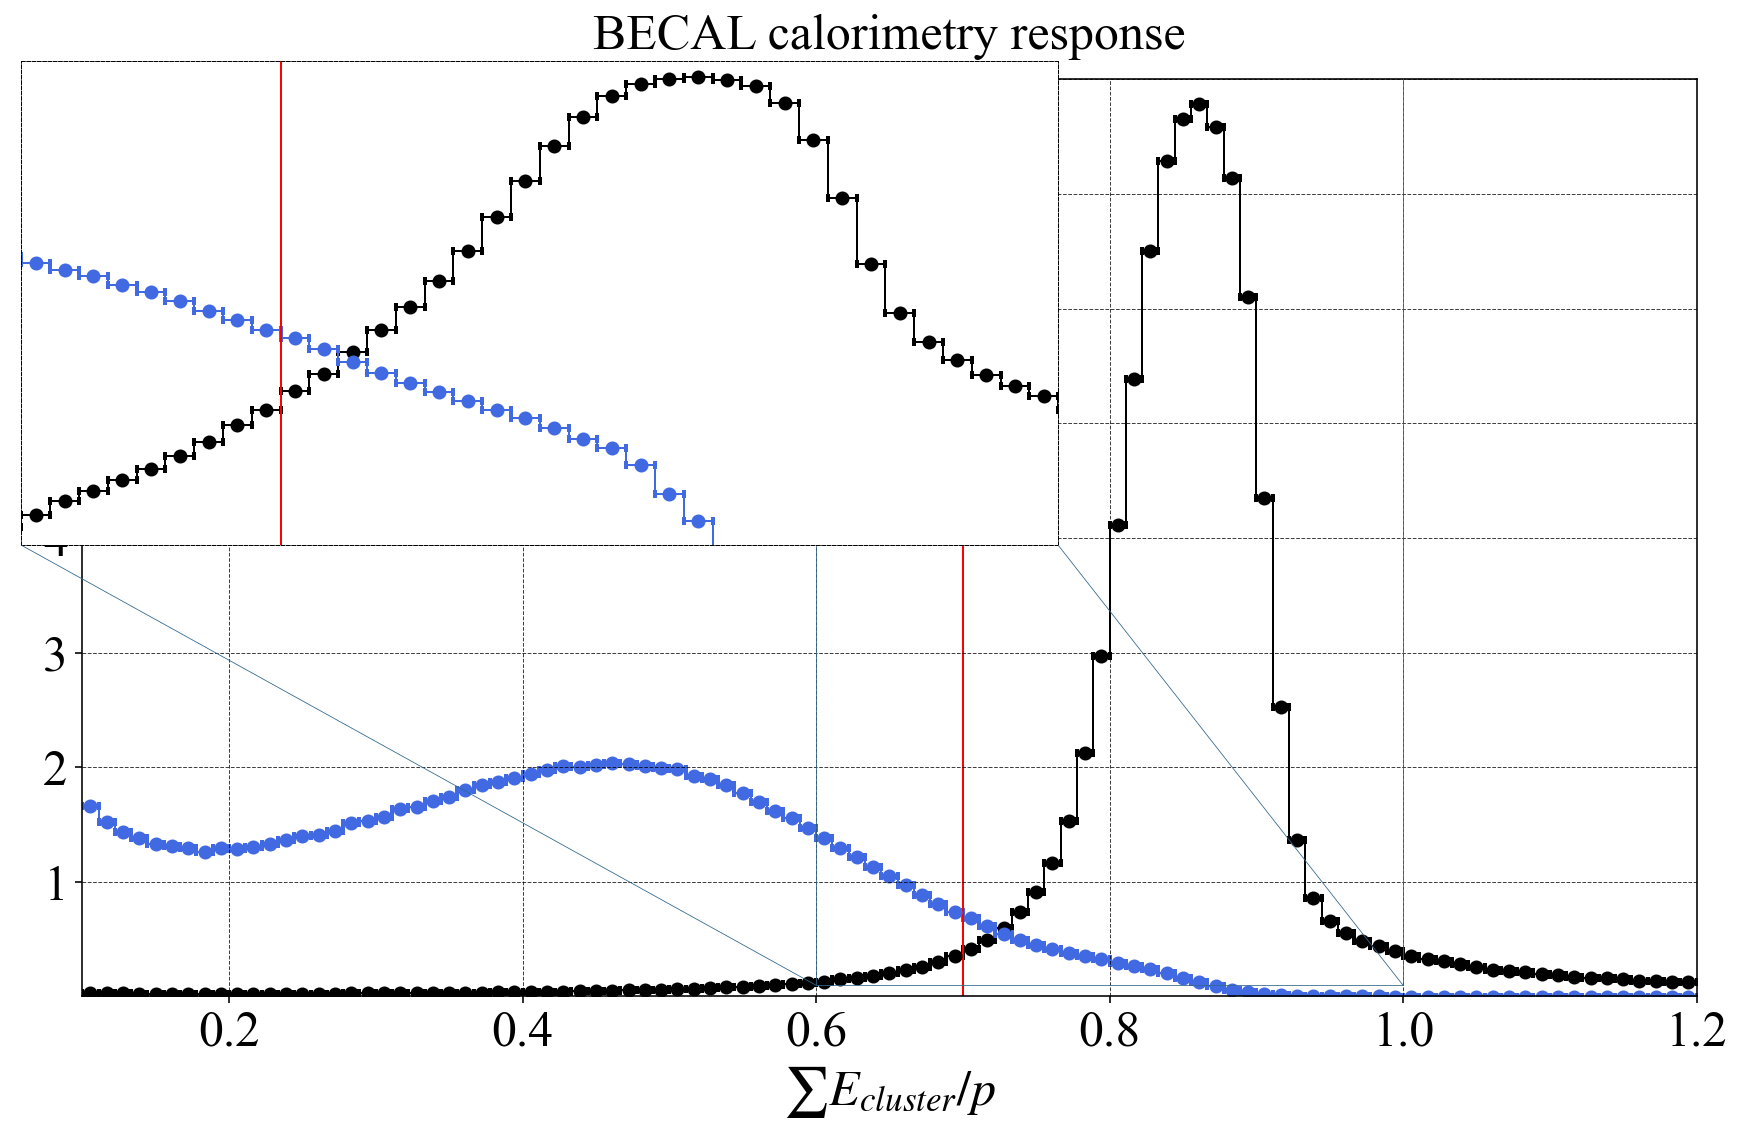

In [215]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(1,1,1)
plot_step_hist( EClusterTot_e [caloname+' E/p'] , bins=EoverP_bins, label="$e$", color=e_color  , density=True)
plot_step_hist( EClusterTot_pi[caloname+' E/p'], bins=EoverP_bins, label="$\pi$", color=pi_color, density=True)
ax.plot( [EoverP_cut,EoverP_cut],[0,9],'-r' )
set_axes(ax,'$\sum E_{cluster}/p$','',title=caloname+' calorimetry response',do_add_grid=True,
         do_add_legend=False,ylim=(0.01,8))

inset = fig.add_axes([0.0, 0.52, 0.6, 0.42], frameon=True)
inset.axes.get_xaxis().set_visible(False)
inset.axes.get_yaxis().set_visible(False)
inset.set_yscale('log')

plot_step_hist( EClusterTot_e [caloname+' E/p'] , bins=EoverP_bins, label="$e$",  color=e_color, density=True)
plot_step_hist( EClusterTot_pi[caloname+' E/p'], bins=EoverP_bins, label="$\pi$", color=pi_color, density=True)
inset.plot( [EoverP_cut,EoverP_cut],[0,9],'-r' )
inset.grid('minor')
inset.set_xlim(0.6, 1.)
inset.set_ylim(0.1, 9)
plt.setp(list(inset.spines.values()), linewidth=0.5, linestyle="--") 
mark_inset(ax, inset, loc1=3, loc2=4, lw=0.4,
           fc='None', ec=color[0], zorder=200)

plt.tight_layout()

#### HCALIN

In [196]:
caloname     = 'HCALIN'
EoverP_bins  = np.linspace(0.001,.12,100)
EoverP_cut   = 0.7
caloname     = 'BECAL'
f_e_in_cut, f_pi_in_cut, f_e_in_cut_err, f_pi_in_cut_err = compute_survival_rate(x_e   = EClusterTot_e  [caloname+' E/p'], 
                                                            x_pi  = EClusterTot_pi[caloname+' E/p'], 
                                                            x_cut = EoverP_cut, filter_direction='below')

print('e survival: %.2f +/- %.2f, pi survival: %.2f+/-%.2f'%( 100.*f_e_in_cut, 100.*f_e_in_cut_err,100.*f_pi_in_cut,100.*f_pi_in_cut_err), '%')

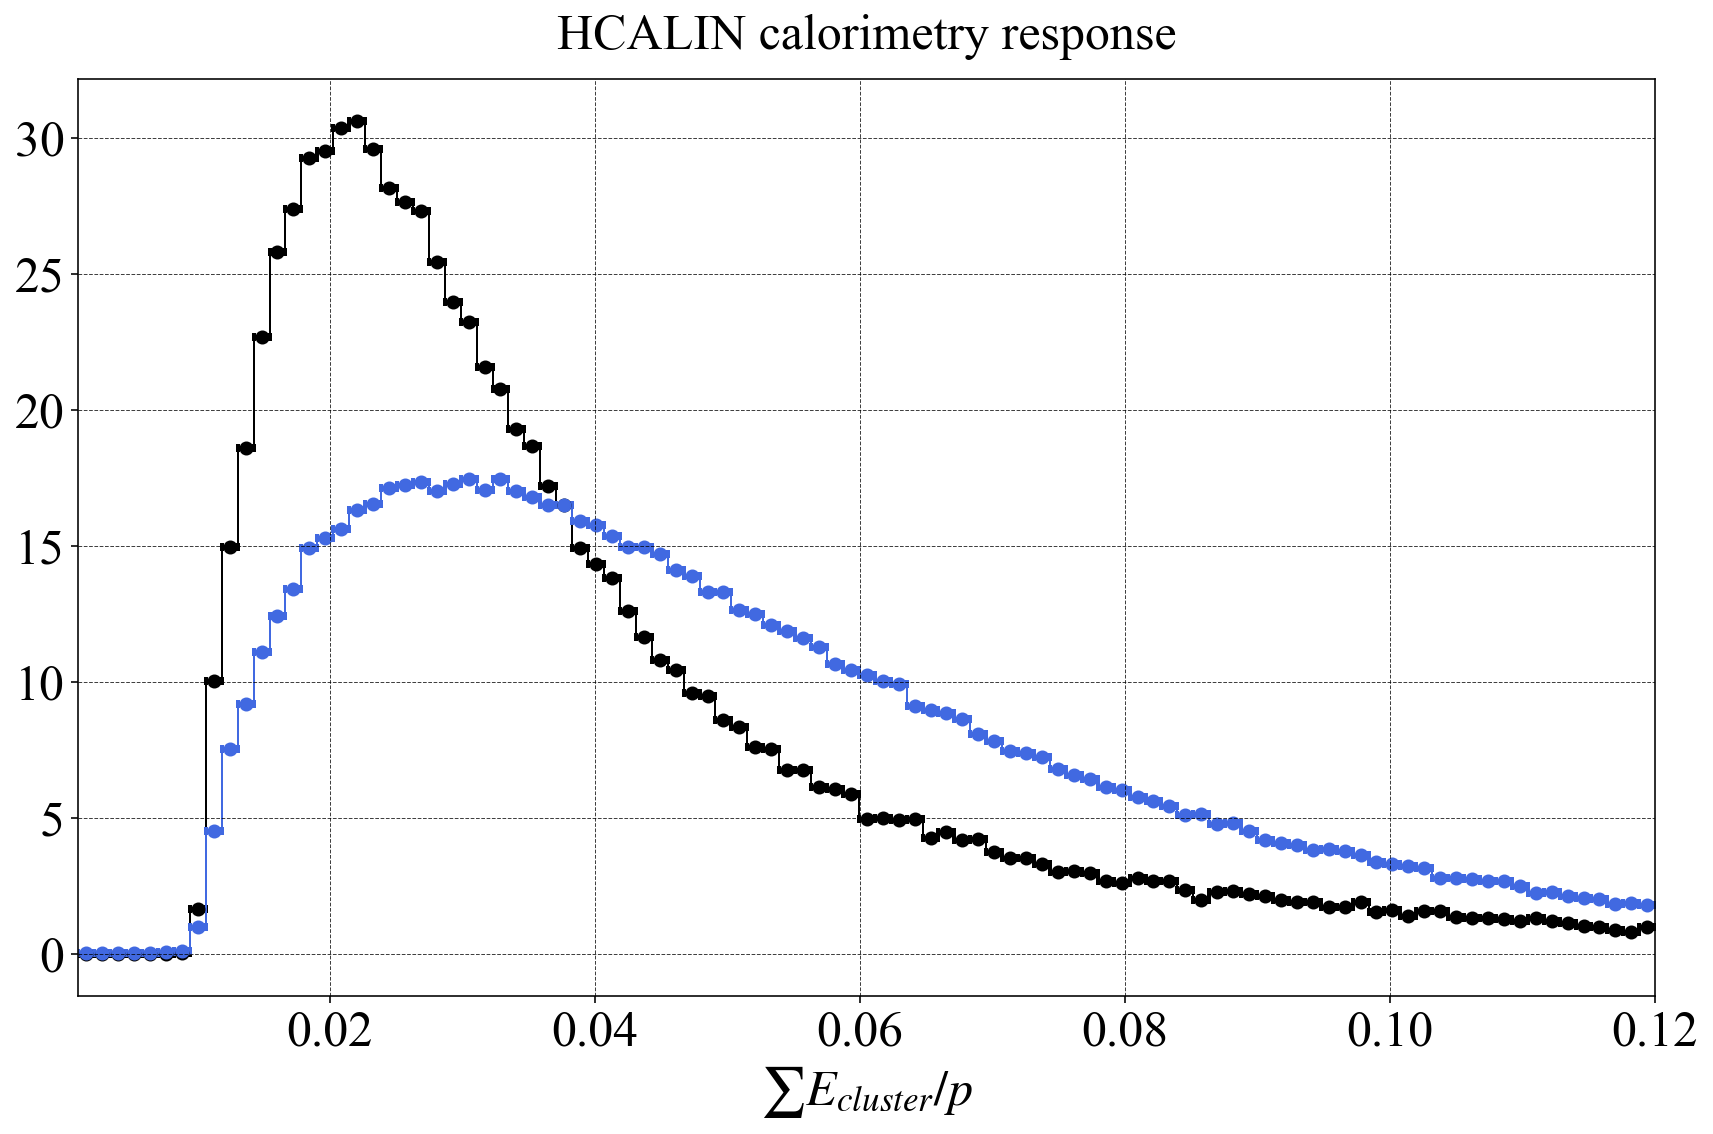

In [197]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(1,1,1)
plot_step_hist( EClusterTot_e [caloname+' E/p'] , bins=EoverP_bins, label="$e$", color=e_color  , density=True)
plot_step_hist( EClusterTot_pi[caloname+' E/p'], bins=EoverP_bins, label="$\pi$", color=pi_color, density=True)
set_axes(ax,'$\sum E_{cluster}/p$','',title=caloname+' calorimetry response',do_add_grid=True,
         do_add_legend=False)#,ylim=(0.01,8))

plt.tight_layout()

#### HCALOUT

In [204]:
caloname     = 'HCALOUT'
EoverP_bins  = np.linspace(0.02,.35,100)

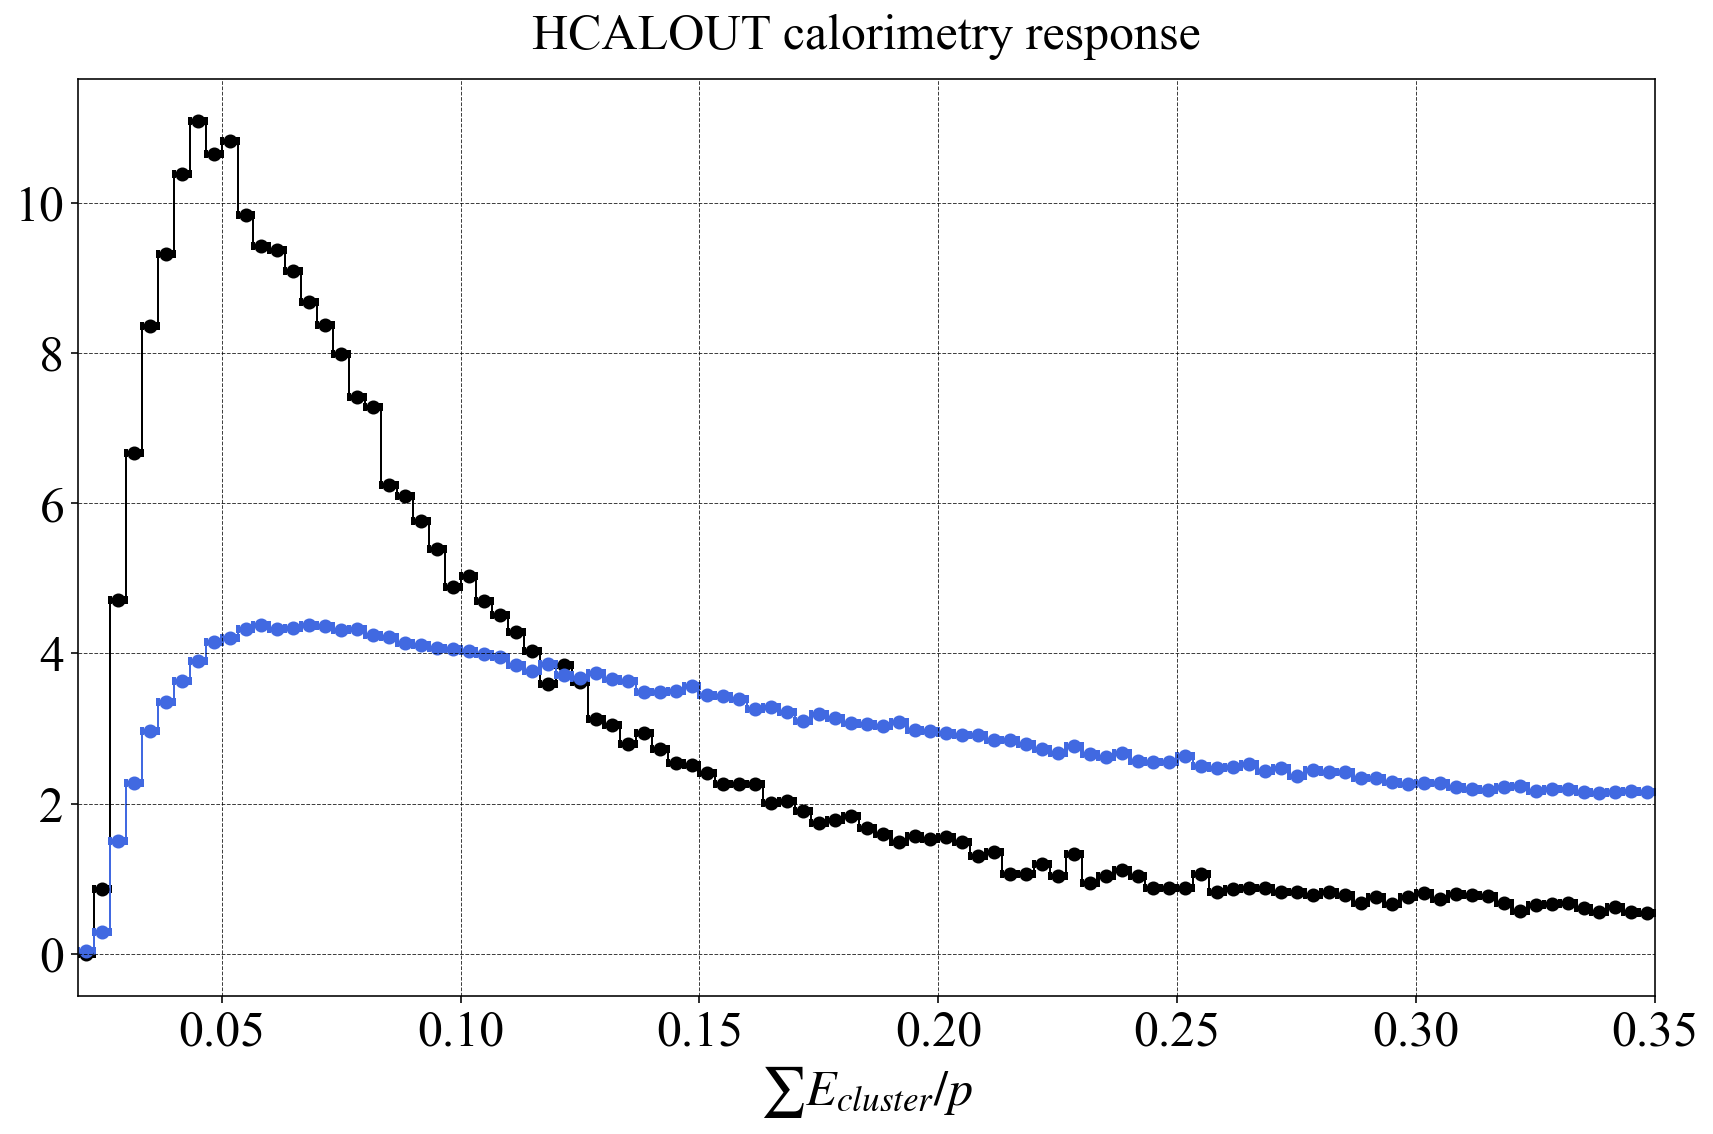

In [205]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(1,1,1)
plot_step_hist( EClusterTot_e [caloname+' E/p'] , bins=EoverP_bins, label="$e$", color=e_color  , density=True)
plot_step_hist( EClusterTot_pi[caloname+' E/p'], bins=EoverP_bins, label="$\pi$", color=pi_color, density=True)
set_axes(ax,'$\sum E_{cluster}/p$','',title=caloname+' calorimetry response',do_add_grid=True,
         do_add_legend=False)#,ylim=(0.01,8))

plt.tight_layout()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


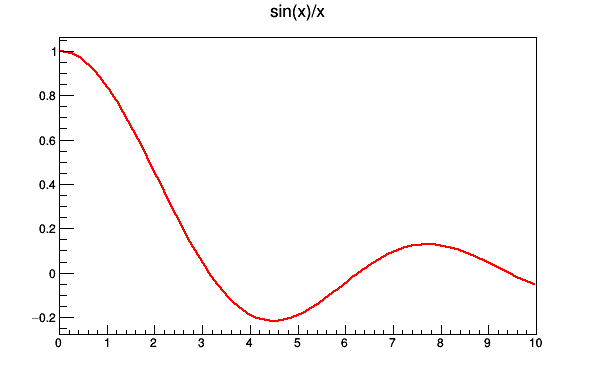

In [15]:
c = ROOT.TCanvas("myCanvasName","The Canvas Title",600,400)
f = ROOT.TF1("f1", "sin(x)/x", 0., 10.)
f.Draw()
c.Draw()

/var/folders/42/n5_htl9n34j9wpgd5rqsnmv40000gn/T/ipykernel_64740/999287522.py:6: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  color = plt.get_cmap('viridis')(sc.linspace(0, 1, 4)[1:3])
/var/folders/42/n5_htl9n34j9wpgd5rqsnmv40000gn/T/ipykernel_64740/999287522.py:26: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  sc.linspace(0, 1, 4))),
/var/folders/42/n5_htl9n34j9wpgd5rqsnmv40000gn/T/ipykernel_64740/999287522.py:31: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  x = sc.linspace(0.1, 100)
/var/folders/42/n5_htl9n34j9wpgd5rqsnmv40000gn/T/ipykernel_64740/999287522.py:32: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  y1 = sc.array(sc.sqrt(x)).T
/var/folders/42/n5_htl9n34j9wpgd5rqsnmv40000gn/T/ipykernel_64740/999287522.p

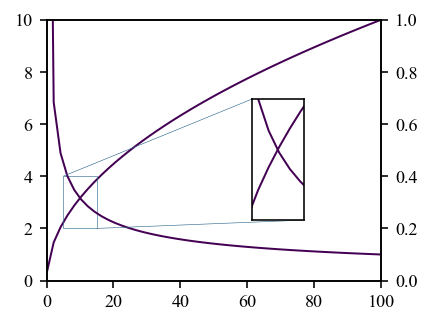

In [95]:
import scipy as sc
from cycler import cycler
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


plt.rcParams.update(params_IEEEtran)

x = sc.linspace(0.1, 100)
y1 = sc.array(sc.sqrt(x)).T
y2 = sc.array(1/sc.sqrt(x)).T

fig = plt.figure('FIG')
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y1)

ax_twinx = ax.twinx()
ax_twinx.plot(x, y2)

ax.set_xlim(0, 100)
ax.set_ylim(0, 10)
ax_twinx.set_ylim(0, 1)

inset = fig.add_axes([0.6, 0.3, 0.12, 0.35], frameon=False)
inset.axes.get_xaxis().set_visible(False)
inset.axes.get_yaxis().set_visible(False)

inset.plot(x, y1)

inset_twinx = inset.twinx()
inset_twinx.axes.get_yaxis().set_visible(False)

inset_twinx.plot(x, y2)

inset.set_xlim(5, 15)
inset.set_ylim(2, 4)
inset_twinx.set_ylim(0.2, 0.4)

mark_inset(ax, inset, loc1=4, loc2=2, lw=0.3,
           fc="none", ec=color[0], zorder=200)
fig.savefig('./example.png', bbox_inches='tight', dpi=300)